## 1] Import Libraries and Dataset

In [1]:
# Importing all the necessary packages

#pandas for DataFrame Manipulation
import pandas as pd
#Numpy for Numerical analysis
import numpy as np
#TensorFlow as Backend for Keras
import tensorflow as tf
from tensorflow import keras
#os module enables the interaction between the user and the operating system and we can use it to do all Os based tasks
#It provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc
import os
#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
#PIL means Python Imaging Library that provides image processing functions like opening,maniulating,saving images of diff formatso 
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
#As our dataset is 3553 images of 5 diff classes in 5 diff folders. 
#It is better to ZIP all these folders and unzip it in jupyter notebook using zipfile module
#importing zipfile module
import zipfile as zf
#Unzipping the file and reading it
files = zf.ZipFile("train.zip", 'r')
#extracting zip file to the location of our project dir
files.extractall('C:/Users/psrao/Data Science Projects/Artificial Intelligence Projects/Diabetic Retinopathy Detection using Artificial Intelligence')
#Closing the file
files.close()

In [3]:
#As we are checking the directories and folders inside a folder which is a OS-based task
#We have to use "os" module listdir() function to get all files and directories inside the mentioned directory in parameters
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [4]:
#Creaing two empty lists 'train' and 'label' to store images and classes of the images respectively
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
# So if we apply for loop on every object inside "train" folder means we are going through every class folder[that will be (i)]
for i in os.listdir('./train'):
    #Every class folder/directories path are joined to train using os.path.join() function
    #After combining all the paths we used 'os.listdir()' function to actually get all the files listed inside them which now produes every single image 
    #previously we could only access the class folders not the inside image content
    train_class = os.listdir(os.path.join('train', i))
    #Applying for loop on every object in train_class means iterating over all the images combined(j).  
    for j in train_class:
        #Now we combined paths of train, i[classes names which are class folder names] and j[images] and store the images in 'img'
        img = os.path.join('train', i, j)
        #images are added to 'train' list by using append() function
        train.append(img)
        #classes are added to 'labels' list by using append() function
        label.append(i)

# Printing the number of images in the dataset
print('Number of train images : {} \n'.format(len(train)))

Number of train images : 3662 



**os.path.join() function:-** This Func'n combines path names into one complete path. This means that you can merge multiple parts of a path into one, instead of hard-coding every path name manually<br>

**len():-**Length function used to find no.of items/elements inside a object. [here we used it to find no.of images in train list]



In [5]:
#Displaying 'train' list with all images of 5 classes combined path
train

['train\\Mild\\0024cdab0c1e.png',
 'train\\Mild\\00cb6555d108.png',
 'train\\Mild\\0124dffecf29.png',
 'train\\Mild\\01b3aed3ed4c.png',
 'train\\Mild\\0369f3efe69b.png',
 'train\\Mild\\03e25101e8e8.png',
 'train\\Mild\\04ac765f91a1.png',
 'train\\Mild\\059bc89df7f4.png',
 'train\\Mild\\05a5183c92d0.png',
 'train\\Mild\\0684311afdfc.png',
 'train\\Mild\\06b71823f9cd.png',
 'train\\Mild\\07929d32b5b3.png',
 'train\\Mild\\07a1c7073982.png',
 'train\\Mild\\086d41d17da8.png',
 'train\\Mild\\09935d72892b.png',
 'train\\Mild\\0a3202889f4d.png',
 'train\\Mild\\0a61bddab956.png',
 'train\\Mild\\0ad7f631dedb.png',
 'train\\Mild\\0d310aba6373.png',
 'train\\Mild\\0dc031c94225.png',
 'train\\Mild\\0dce95217626.png',
 'train\\Mild\\0eb52045349f.png',
 'train\\Mild\\0f495d87656a.png',
 'train\\Mild\\0fb1053285cf.png',
 'train\\Mild\\101b9ebfc720.png',
 'train\\Mild\\107aea0d9289.png',
 'train\\Mild\\10f36b0239fb.png',
 'train\\Mild\\1116271db4ea.png',
 'train\\Mild\\111898ab463d.png',
 'train\\Mild\

In [6]:
#Displaying 'label' list which contains all the classes of images
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

## 2] Data Exploration and Data Visualization

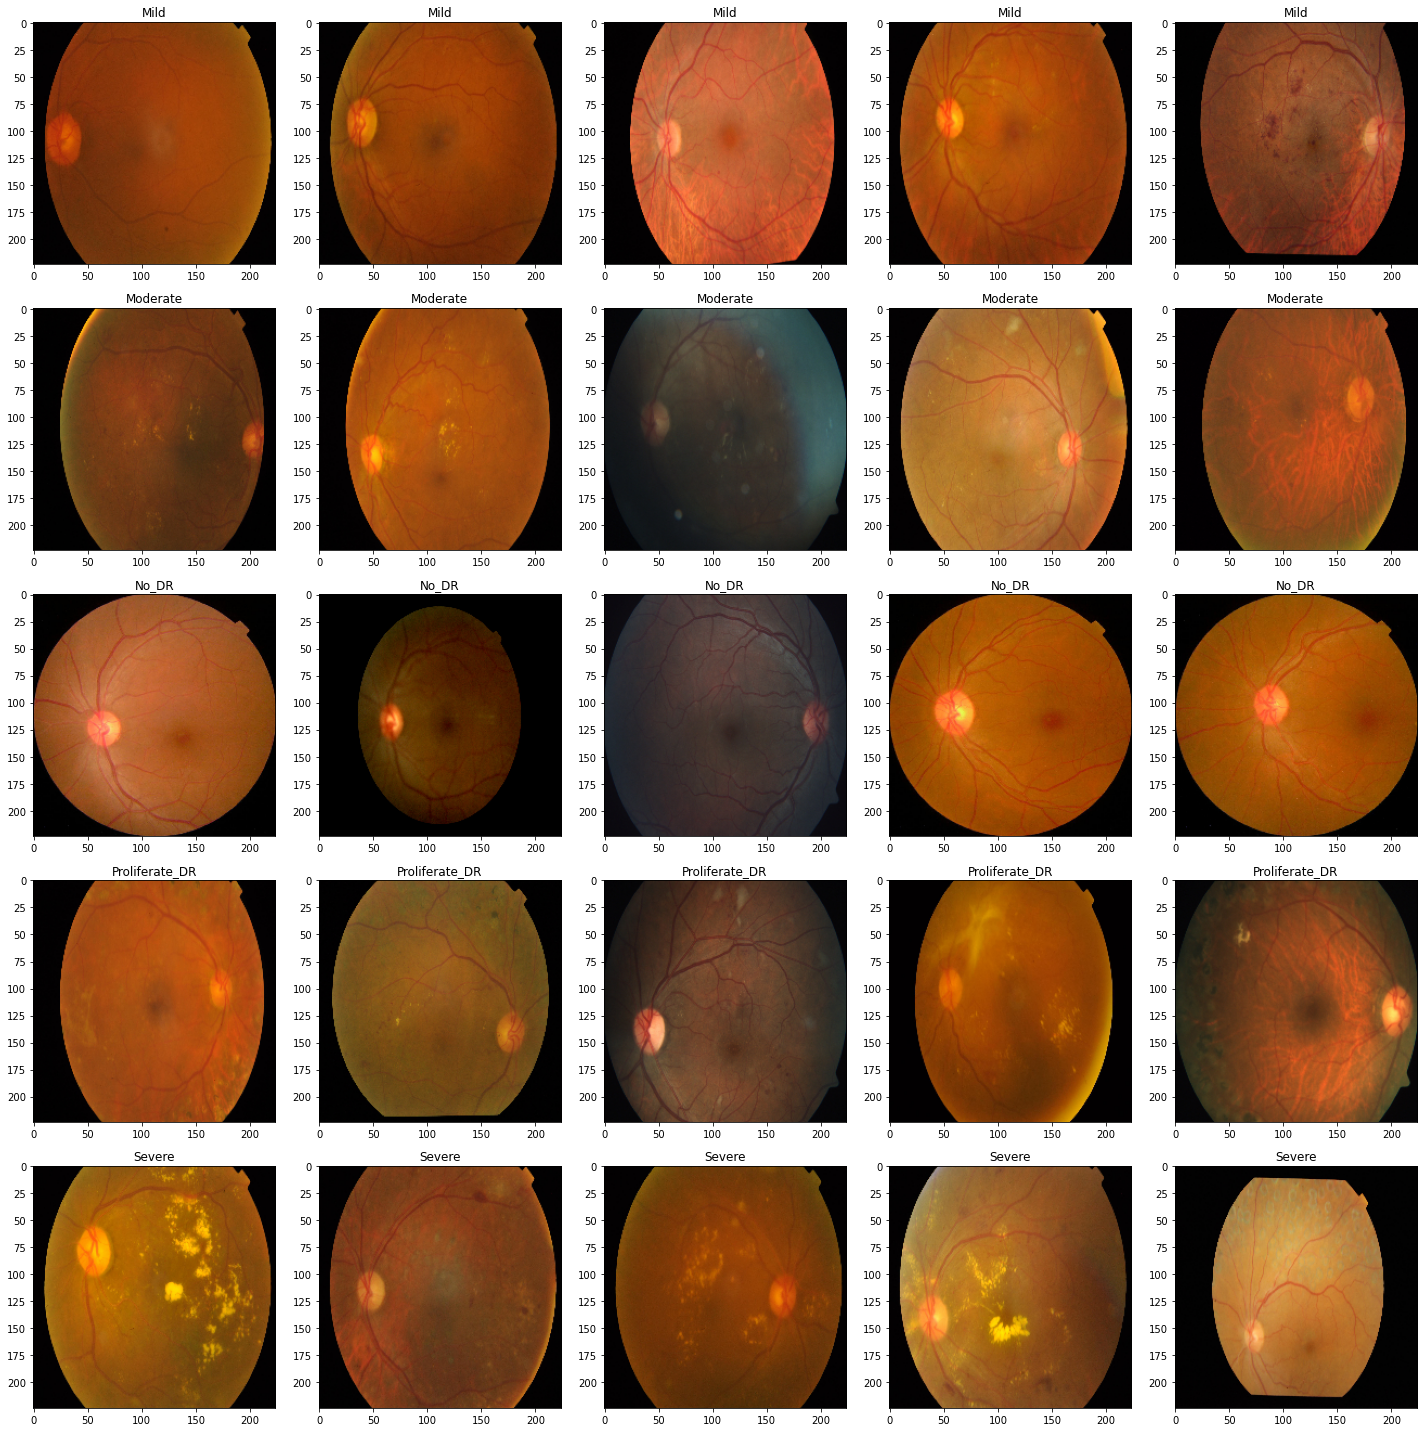

In [7]:
# Visualize 5 images for each class in the dataset

#We are creating 5*5 grid. 5 images for each of the five classes. Height and width in figsize is set at 20 
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
#Initializing a count variable with 0. So that after incrementing we can iterate over to other classes
count = 0
#This for loop iterates over the five class folders
for i in os.listdir('./train'):
    #after a class folder [Ex:- Mild] is picked we join its path with train so that we can access the class folder[i.e, (i)] 
    # get the list of images in a given class
    train_class = os.listdir(os.path.join('train', i))
    #This for loop we are joining images inside folders(j) to 'train','i'[i.e., class folders] 
    #in the range of 5 means, we only iterate over 5 items(i.e., images)
    # plot 5 images per class
    for j in range(5):
        #storing the images we iterated inside 'img' 
        img = os.path.join('train', i, train_class[j])
        #Using PIL(Python Imaging Library) module to open the images stored in 'img' 
        img = PIL.Image.open(img)
        #We are setting the title of image to the class name[i.e., the class names of images stored in (i)] the image belongs to
        axs[count][j].title.set_text(i)
        #using imshow() function to show the image
        axs[count][j].imshow(img)
    #We are updating the count variable by incrementing so that 5 images of a class is completed, next class images will be iterated for 5 images
    count += 1

#When you have multiple subplots(can be fig plots,bar graphs, line graphs,..), labels of different axes are 
#often overlapping each other.
#So, tight_layout() function is used to adjust spacing between subplots to minimize the overlapping of one plot over other.
fig.tight_layout()


In [8]:
# Calculating number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
#We get classes with this for loop iteration
for i in os.listdir('./train'):
    #The classes are joined to train and the classes(i) are stored in train_classes 
    train_class = os.listdir(os.path.join('train', i))
    #The length of every class is no.of images in it, which can be calculated using len() and store in No_images_per_class list
    #for every class in iteration
    No_images_per_class.append(len(train_class))
    #Class_name list updated
    Class_name.append(i)
    #Printing 'no.of images'[i.e., len(train_class)] in each class(i)
    print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 370 

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 



**countplot():-**Function of seaborn that is used to create bar charts to know no.of observations under each class.
- **Ex:-** In this project we can use countplot to know no.of images in each class

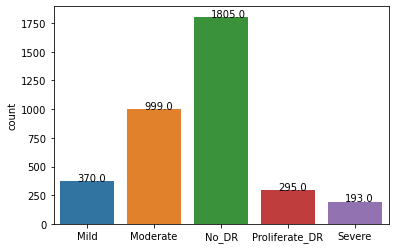

In [9]:
#plotting a bar graph to know no.of images under each class
#As we need to count no.of images in each class. 
#We just need to pass 'label' list which has all images labels so that countplot counts no.of times each class is present
#In vertical bar graphs, we assign classes/categorical variable to x-axis
countplt=sns.countplot(x=label)
for p in countplt.patches:
    #We are getting no.of observations in each class by using get_height() function on each bar of the graph
    countplt.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

**We can now see that it is a unbalanced dataset with 'No_DR' and 'Moderate' classes as major classes and 'Mild' , 'Proliferative_DR' and 'Severe' as minor classes**

In [10]:
No_images_per_class

[370, 999, 1805, 295, 193]

In [11]:
Class_name

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

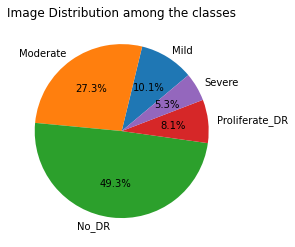

In [12]:
# Creating a pie chart
#To plot a pie chart we need the input values to be in datastructures with sequential numerical values and 
#labels corresponding to them in the same length. Some ex of datastructures of this type dictionaries,lists,tuples,...
#So we took 'No_images_per_class'(which contains the no.of images of each list as shown above) list as 'x' to plot piechart 
#And we took 'Class_name'(which contain s the labels corresponding to No_images_per_class) to name/label the pies of chart plotted 
#we set the autopct parameter to '%1.1f%%', which formats the percentage labels to one decimal place
plt.pie(x=No_images_per_class,labels=Class_name,autopct='%1.1f%%', startangle=40)

#Adding a title to the pie chart
plt.title('Image Distribution among the classes')

# Show the pie chart
plt.show()

**pd.DataFrame():-** is a function in the pandas library of Python programming language that creates a 2-dimensional labeled data structure called a DataFrame. It can be thought of as a table in a relational database or a spreadsheet.
- The DataFrame consists of rows and columns, where each column can have a different data type such as numeric, string, boolean, datetime, etc. It is a flexible and powerful data structure that can handle large datasets efficiently and provide various operations such as filtering, sorting, merging, joining, grouping, pivoting, etc.
- The pd.DataFrame() function can take various types of input data such as lists, arrays, dictionaries, tuples, or other dataframes, and convert them into a new dataframe.[Here in the above example, train and label assigned to columns are lists]


In [13]:
#Creating a dataframe 'retina_df' using pd.DataFrame() function
#Then the parameters we passed are in form of dictionary. The dataframe we created here will have 'Image' and 'Labels' as columns
#Then we attached all the image paths in 'train' to 'Image' coloumn and 
#classes corresponding to images in 'label' to 'Label' coloumn
retina_df = pd.DataFrame({'Image': train,'Labels': label})
#Printing the ccreated dataframe 'retina_df'
retina_df

Image  Labels
0       train\Mild\0024cdab0c1e.png    Mild
1       train\Mild\00cb6555d108.png    Mild
2       train\Mild\0124dffecf29.png    Mild
3       train\Mild\01b3aed3ed4c.png    Mild
4       train\Mild\0369f3efe69b.png    Mild
...                             ...     ...
3657  train\Severe\f9156aeffc5e.png  Severe
3658  train\Severe\fb61230b99dd.png  Severe
3659  train\Severe\fcc6aa6755e6.png  Severe
3660  train\Severe\fda39982a810.png  Severe
3661  train\Severe\fe0fc67c7980.png  Severe

[3662 rows x 2 columns]

## 3] PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [14]:
# Shuffle the data stored in dataframe 'retina_df' using shuffle function so that we dont get the same class images in test data
#Shuffling the data makes us get train and test sets with mix of all class images
retina_df = shuffle(retina_df)
#Splitting the data in to train(80%) and test(20%) sets using train_test_split() function
train, test = train_test_split(retina_df, test_size = 0.2)

**Data Augmentation:-**Data augmentation is a technique used in machine learning and computer vision to artificially increase the size and diversity of a dataset by creating new examples through various transformations of the existing data. This technique can be especially useful when the original dataset is small or when the model needs to be trained on a wider range of variations of the input data to improve its accuracy and generalization capabilities.<br>
Data Augmentation can be done on images,audio,text,...
- Some common data augmentation techniques for images include:(As this project is based on images of retina)
   - Geometric transformations: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance. 
   - Color space transformations: randomly change RGB color channels, contrast, and brightness.
   - Kernel filters: randomly change the sharpness or blurring of the image. 
   - Random erasing: delete some part of the initial image.
   - Mixing images: blending and mixing multiple images. 

**Data Generator:-**Data generators are Python functions that can generate batches of augmented data on the fly during training, rather than storing all the augmented data in memory. 
- This is particularly useful when dealing with large datasets that can't fit into memory, or when dealing with real-time data streams.
- The data augmentation techniques are used to generate new examples, while the data generator function is used to load and preprocess the augmented data on the fly during training.
- **ImageDataGenerator()** is a class from the tensorflow.keras.preprocessing.image module that generates augmented image data in batches.Example:- It releases 32 images if batch-size is 32 per iteration while training the model.

**Data Normalization:-**Normalization is a common data preprocessing technique used in machine learning and deep learning to scale the input data to a common range.
- In image processing, normalization typically involves scaling the pixel values of an image to a range of [0, 1].


**Creating train_datagen and test_datagen objects using ImageDataGenerator() class for generating test,train and validation sets in next step**

In [15]:
# Create run-time Data(Image) augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
#Data Generator for 'train' set data
#rescale = 1./255 is used to rescale the pixel values of the input images to the range [0, 1].
#shear_range = 0.2 means images are tilted by 0.2 radians along the axis so that machine can train on images in diff angles.
#validation_split = 0.15 means 15% of training data is splitted into validation set. 
#The validation set will be used to monitor the performance of the model during training and to tune the hyperparameters.
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we are only normalizing the data by resacaling it.No data augmentation in test set
test_datagen = ImageDataGenerator(rescale = 1./255)

**Parameters and methods used in creation of datagenerator:-**
- **flow_from_dataframe() method:-** takes the Pandas DataFrame and the path to a directory and generates batches of augmented/normalized data.

- **directory='./':-** The directory parameter specifies the location of the image files, which is set to ./ (i.e., the current directory). 

- **x_col and y_col:-** The x_col parameter specifies the name of the column in the DataFrame that contains the file names of the images(i.e., "Image" coloumn), and y_col specifies the column that contains the labels(i.e., "Labels" coloumn). 

- **target_size:-** The target_size parameter specifies the size of the input images that the model will expect.We lready know that all the retina images are of 256*256(width*height in pixels) 

- **color_mode:-** The color_mode parameter specifies the color mode of the images, which is set to RGB. 
- **class_mode:-** The class_mode parameter is set to "categorical" because the labels are one-hot encoded. 
- **batch_size:-** The batch_size parameter specifies the size of the batches that will be generated by the generator.We already know that data generator generates batches of augmented data.So the batch size(no.of images per iteration) is specified by this parameter


In [16]:
#Generating train,test and validation sets using the above created objects and store them in train_generator,test_generator and
#validation_generator respectively
# Creating datagenerator for training set.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    # Previously We had split the train set further again for training(85%) and validation(15%)
    # So, by mentioning subset as 'training' we are refering the data generator to take trainining split only for input
    subset='training')

# Creating datagenerator for validation set.
validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    # Previously We had split the train set further again for training(85%) and validation(15%)
    # So, by mentioning subset as 'validation' we are refering the data generator to take validation split only as input
    subset='validation')

# Creating datagenerator for test dataset.
test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


**Explanation of output of the above cell:-** After we performed Data Augmentation, all the images are slightly transformed and we got the diversity in dataset by having all the 5 classes data in each of train,test and validation sets.
- **Note:-** Here we had done data augmentation to get diversity in dataset, not to increase the size of dataset.(Which can also be seen when sum of no.of images in all sets calculated)
    - After Data Augmentation:- 2490(training)+439(validation)+733(test)=3662
    - Total no.of images in original dataset is 3662

## 4] BUILD RES-BLOCK BASED DEEP LEARNING MODEL

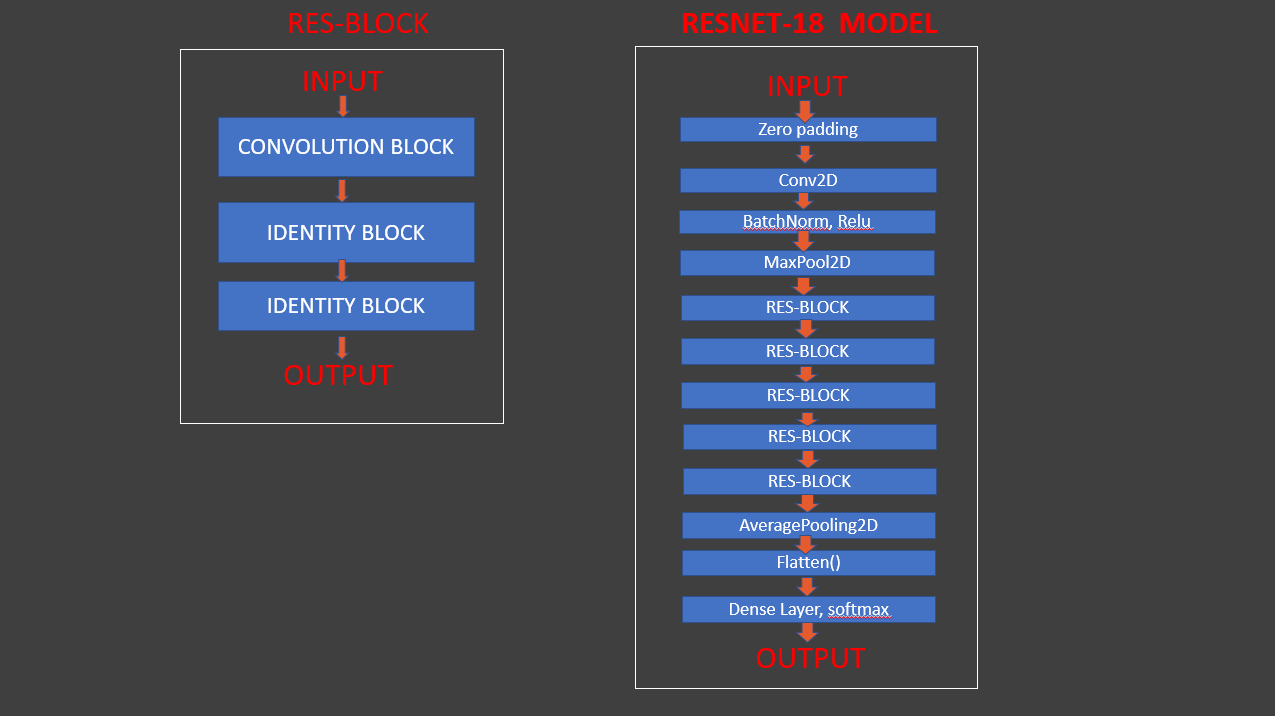

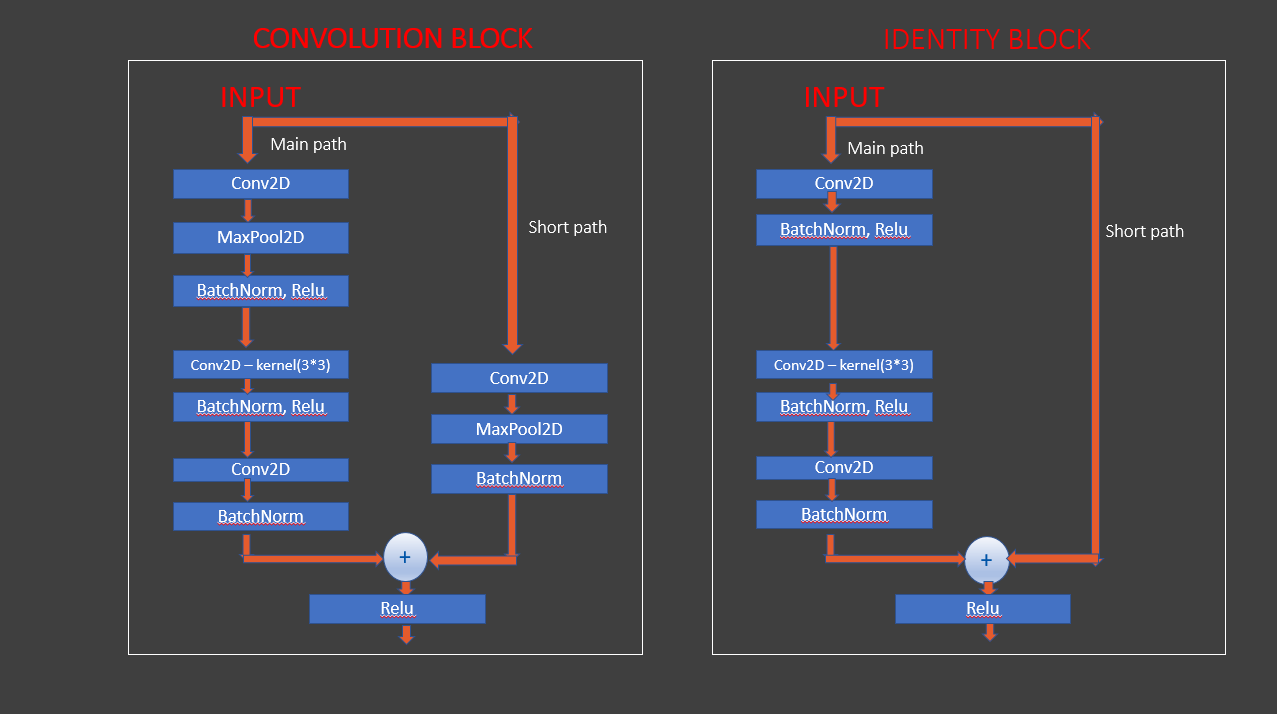

### <u>Creating RES-Blocks for RESNET-18:-</u>

In [17]:
#Res-blocks are the blocks that are repeatedly used in building RESNET-18(See Flow chart)
#So, it is better to create a function on res-block rather than retyping the code everytime.
#Refer the flow chart of res-block above to know how the blocks and layers inside the blocks are to be arranged


#Creating/Defining a function 'res_block'
def res_block(X, filter, stage):
    #X: the input tensor to the residual block
    #filter: a tuple containing the number of filters to use for each convolutional layer in the block
    #stage: an integer indicating the stage of the block (used for naming layers)
    
# Convolutional_block
    X_copy = X
    (f1 , f2, f3) = filter
    
   # Main Path of Convolutional_block(Refer the flow chart)
    #The Conv2D layer applies a 1x1 convolution to the input tensor X with f1 filters
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    #max pooling layer with a 2x2 pool size
    X = MaxPool2D((2,2))(X)
    #BatchNormalization layer normalizes the output of the previous layer along the channel axis
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    #Activation layer applies the rectified linear unit (ReLU) activation function to the normalized output.
    X = Activation('relu')(X) 
    
    #Conv2D layer applies a 3x3 convolution to the output of the previous layer with f2 filters and same padding, 
    #followed by a BatchNormalization layer and an Activation layer
    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 
    
    #third convolutional layer of the main path.
    #The Conv2D layer applies a 1x1 convolution to the output of the previous layer with f3 filters, followed by a BatchNormalization layer.
    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)
    
  # Short path of Convolutional_block
    #X_copy is the copy of the input tensor 'x'.'x' is copied and stored in 'X_copy' so that we can apply short path on it 
    #without disturbing the oroginal input tensor which also disturbs the main path 
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)
    
  # ADD(Adding Main path and short path then applying ReLU activation Function on the added result)
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    
  # Identity Block 1
    X_copy = X
    
    # Main Path of Identity Block 1
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD(Short Path of Identity Block 1. We just did add because in identity block we add the input as it is)
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    
    
  # Identity Block 2
    X_copy = X

    # Main Path of Identity Block 2
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD(Short Path of Identity Block 2. We just did add because in identity block we add the input as it is)
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

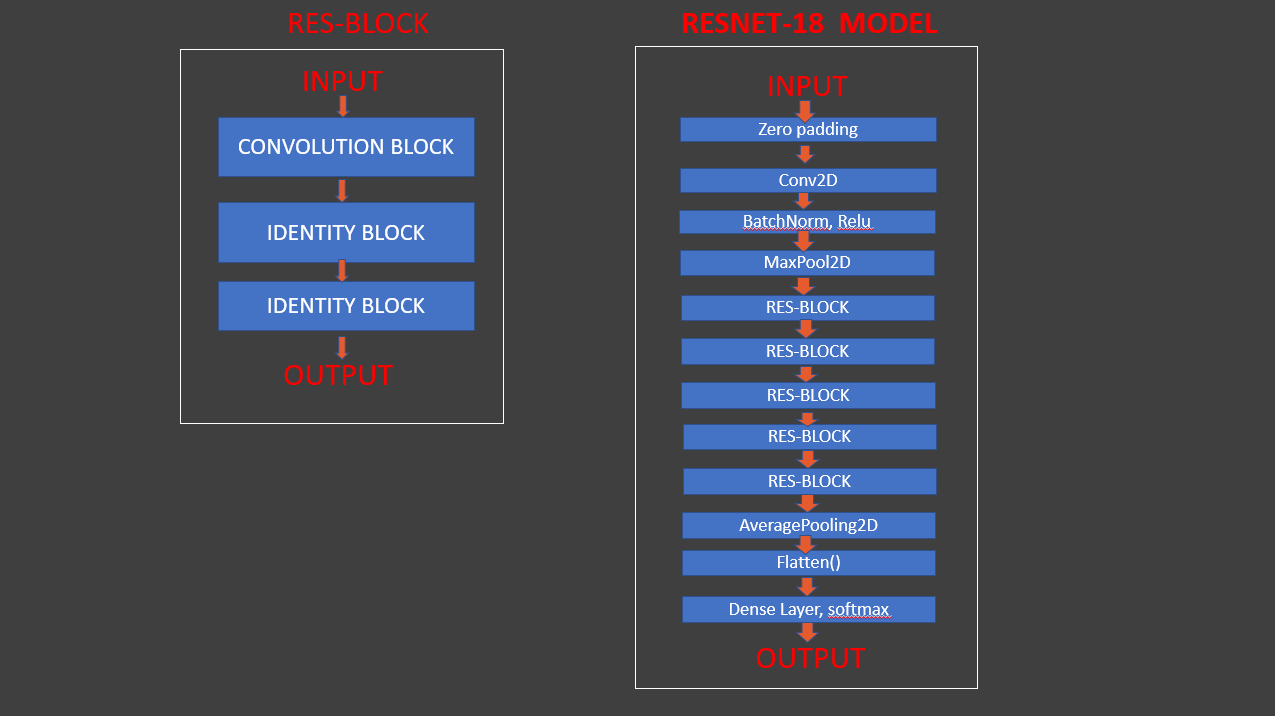

### <u>RESNET-18 MODEL CREATION:-</u>

In [18]:
#Model Creation

#The input shape for the model is defined as a tuple with height=width=256(as input image is 256*256), and 3color channels(RGB).
input_shape = (256,256,3)

#Keras Input layer with the specified input shape.
X_input = Input(input_shape)

#Applying zero padding to the input layer. The padding of 3 pixels is added on each side of the input tensor.
#Padding means just adding zeros to make the multiple sequences(text or image pixels) to be on same shape(length).
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
#This applies a 2D convolution layer to the input tensor with 64 filters of size 7x7 and stride of 2x2. The layer is named 'conv1' and initialized with the glorot_uniform method.
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
#This applies batch normalization to the output of the previous convolution layer along the channel axis. The layer is named 'bn_conv1'.
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
#This applies a ReLU activation function to the output of the previous layer.
X = Activation('relu')(X)
#This applies a max pooling layer with a pool size of 3x3 and stride of 2x2 to the output of the previous layer.
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage(Res-block 1)
#This applies a ResNet block with 64, 64, and 256 filters in the three convolutional layers to the output of the previous layer.
X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage(Res-block 2)
#This applies a ResNet block with 128, 128, and 512 filters in the three convolutional layers to the output of the previous layer. 
X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage(Res-block 3)
#This applies a ResNet block with 256, 256, and 1024 filters in the three convolutional layers to the output of the previous layer. 
X = res_block(X, filter= [256,256,1024], stage= 4)

# 5- stage(Res-block 4)
#This applies a ResNet block with 512, 512, and 2048 filters in the three convolutional layers to the output of the previous layer. 
X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling2D layer applied on output from previous layer
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Flattening: flattens the output tensor from the previous layer to a 1D tensor.
X = Flatten()(X)

#Final layer.Densely connected NN with Dense Layer then hidden layer and finally output 
#Fully connected Dense layer with 5 output units and a softmax activation function to the output of the previous layer. 
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


#Creating a RESNET-18 Keras model with the specified input(input taken is X_input of images 25*256) 
#and output layers(Final output 'X' after all the above layers applied will be the output).Naming the model as 'Resnet18'.
model = Model( inputs= X_input, outputs = X, name = 'Resnet18')


In [19]:
#Summary of the RESNET-18 model created 
model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

### Model Summary Explanation:-
**Model has:-**
- Total paramaters(Trainable+Non-Trainable): 19,950,213
- Trainable parameters: 19,907,845
- Non-trainable parameters: 42,368

**Parameters:-**parameters generally refer to the weights and biases of the neurons.
- **Trainable parameters:-**Type of Parameters(weights of neurons) that can be updated in training.During the training,Optimizer algorithm updates these weights to minimize the loss function and improve the accuracy of the model.
- **Non-trainable parameters:-**Type of Parameters(weights of neurons) that cannot be updated in training.These typically include the parameters of BatchNormalization layers and other regularization layers.

## 5]MODEL COMPILATION 

**Optimizer:-** Optimizer is used to minimize the loss function of a model during training by adjusting the model parameters or weights.
- The optimizer determines how much the weights of each neuron should be updated in response to the loss gradient.
- The goal of the optimizer is to find the set of weights that result in the lowest possible loss for the given training data.
- **Adam Optimizer** is often preferred in deep learning models due to its fast convergence and robustness to noisy gradients. It is widely used in various types of neural networks, such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), and transformer models.

**Categorical Crossentropy Loss:-** Categorical cross-entropy is a common loss function used for multi-class classification problems where each sample can belong to only one class. It calculates the cross-entropy between the predicted probabilities and the true class labels.

In [20]:
#Compiling the model using compile() method
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [21]:
#using early stopping to exit training if validation loss is not decreasing even after 7 consecutive epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

#save the best model with lower validation loss in the weights.hdf5 file
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

## 6]TRAINING THE MODEL

**Steps_per_epoch:-** Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch.
- Here we have 77 steps

In [22]:

history = model.fit(
    #batch size form training train_generator is 32
    train_generator,steps_per_epoch = train_generator.n // 32, 
    epochs = 24,
    validation_data= validation_generator, validation_steps= validation_generator.n // 32, 
    callbacks=[checkpointer , earlystopping])

Epoch 1/24
77/77 [==============================] - ETA: 0s - loss: 1.4393 - accuracy: 0.6176
Epoch 1: val_loss improved from inf to 1.61106, saving model to weights.hdf5
77/77 [==============================] - 587s 7s/step - loss: 1.4393 - accuracy: 0.6176 - val_loss: 1.6111 - val_accuracy: 0.2620
Epoch 2/24
77/77 [==============================] - ETA: 0s - loss: 0.8796 - accuracy: 0.6831
Epoch 2: val_loss improved from 1.61106 to 1.36998, saving model to weights.hdf5
77/77 [==============================] - 508s 7s/step - loss: 0.8796 - accuracy: 0.6831 - val_loss: 1.3700 - val_accuracy: 0.4928
Epoch 3/24
77/77 [==============================] - ETA: 0s - loss: 0.8109 - accuracy: 0.7083
Epoch 3: val_loss did not improve from 1.36998
77/77 [==============================] - 458s 6s/step - loss: 0.8109 - accuracy: 0.7083 - val_loss: 1.9342 - val_accuracy: 0.2620
Epoch 4/24
77/77 [==============================] - ETA: 0s - loss: 0.7852 - accuracy: 0.7189
Epoch 4: val_loss did not imp

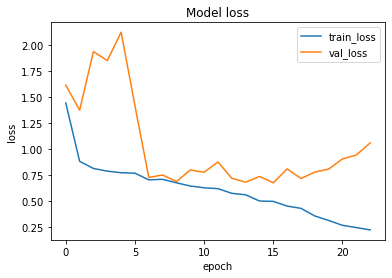

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

## 7]ASSESSING THE PERFORMANCE OF THE TRAINED MODEL

In [26]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 29s 1s/step - loss: 0.9669 - accuracy: 0.7514
Accuracy Test : 0.7514204382896423


In [27]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [28]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


1/1 [==============================] - 0s 82ms/step


In [29]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.747612551159618


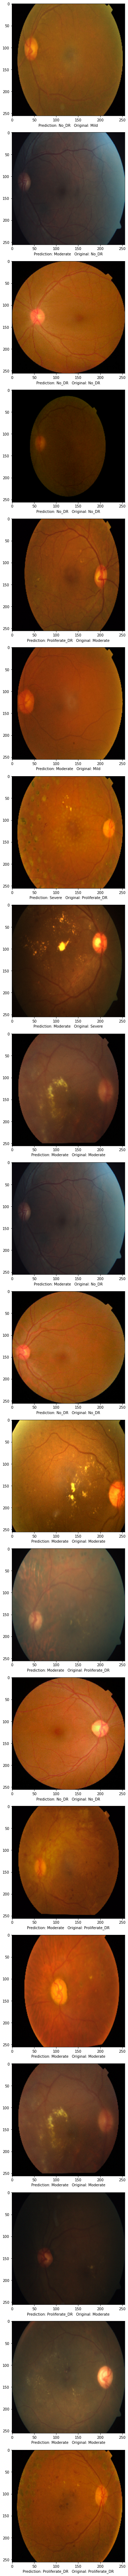

In [30]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

#### Classification Report:-

In [31]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.57      0.24      0.34        71
      Moderate       0.58      0.87      0.70       194
         No_DR       0.96      0.92      0.94       371
Proliferate_DR       0.24      0.15      0.18        61
        Severe       0.52      0.31      0.39        36

      accuracy                           0.75       733
     macro avg       0.58      0.50      0.51       733
  weighted avg       0.74      0.75      0.73       733



#### Confusion Matrix:-

Text(0.5, 1.0, 'Confusion Matrix')

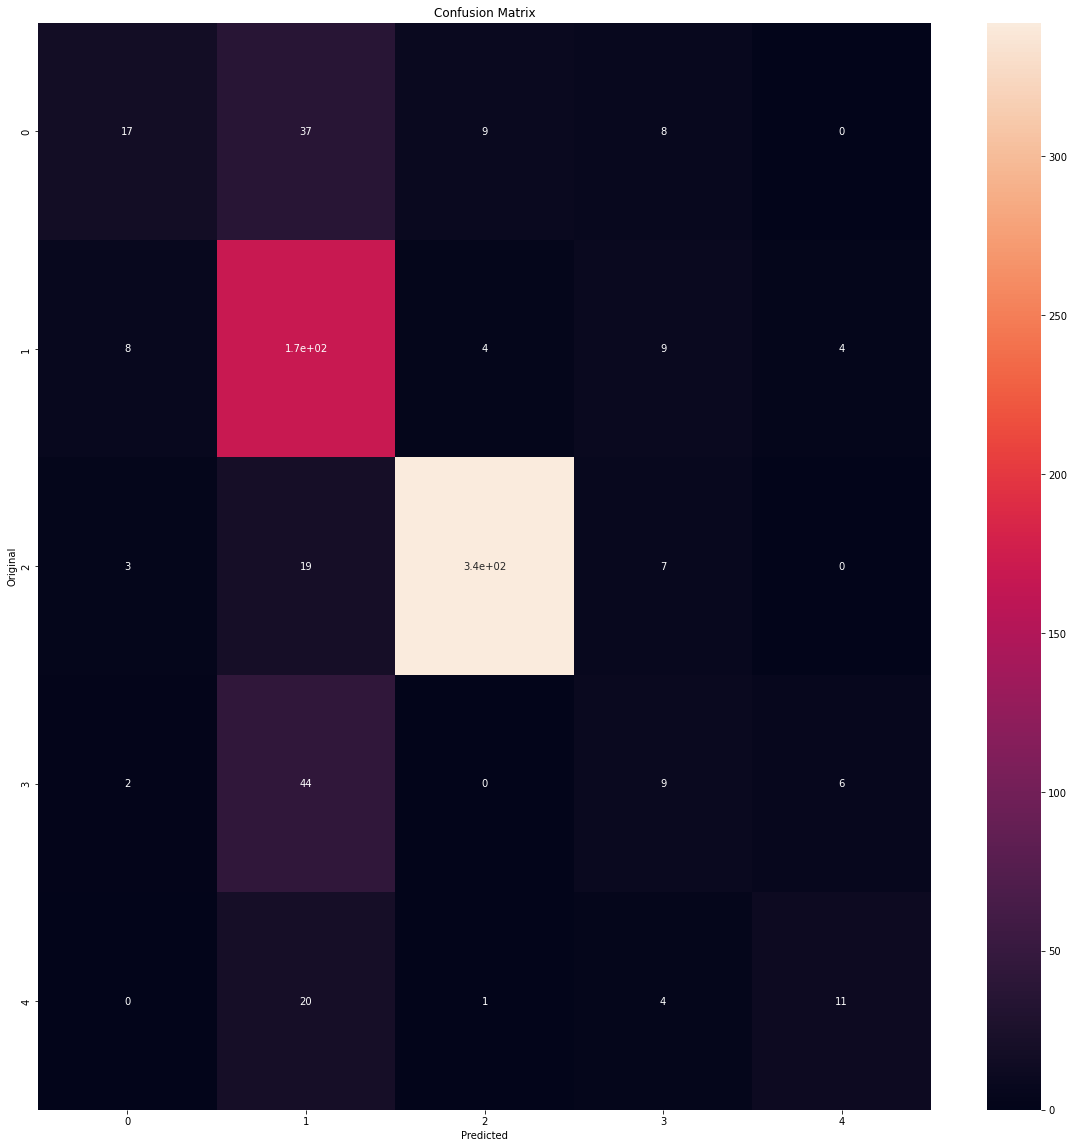

In [33]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion Matrix')